<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_4/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

print("Upload file train.csv:")
uploaded_train = files.upload()

print("\nUpload file test.csv:")
uploaded_test = files.upload()

Upload file train.csv:


Saving train.csv to train (2).csv

Upload file test.csv:


Saving test.csv to test (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load file setelah diupload
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Tampilkan 5 baris pertama
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


📋 Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

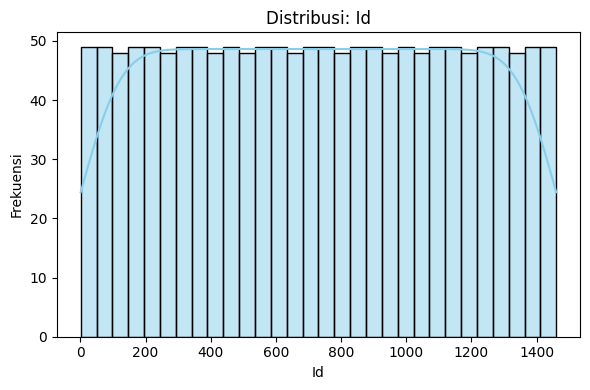

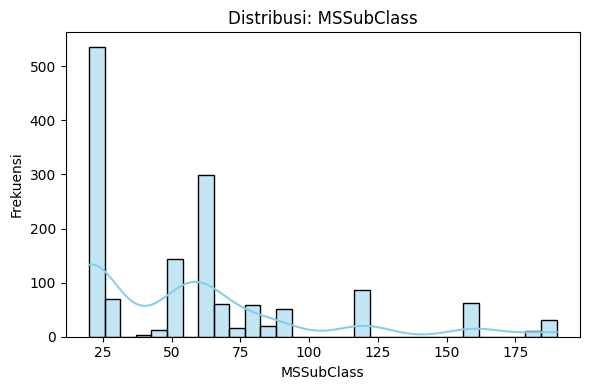

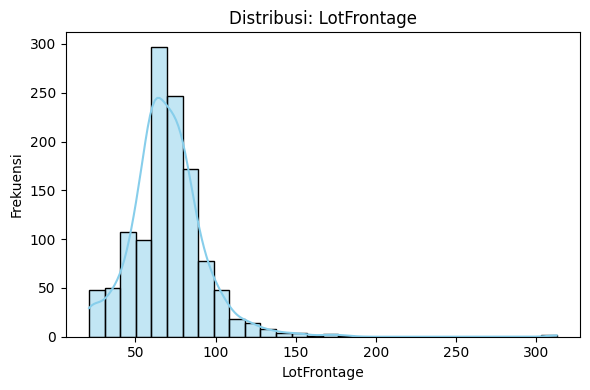

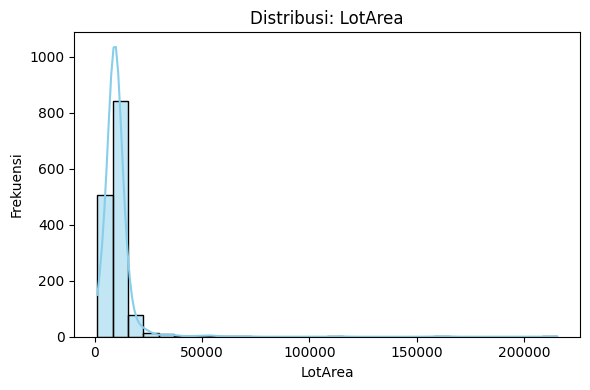

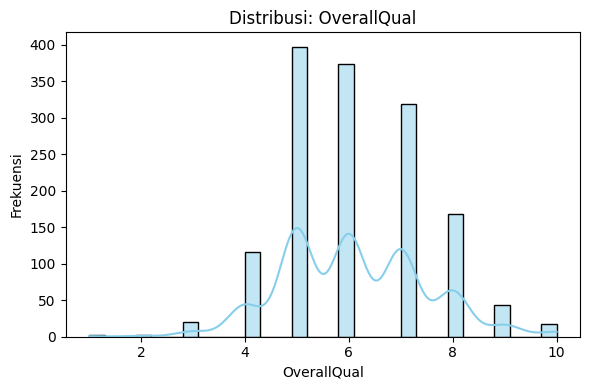

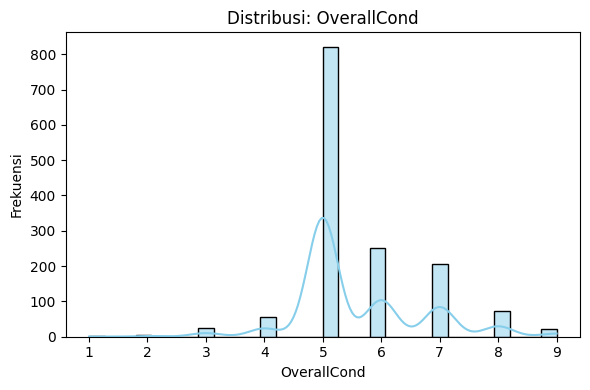

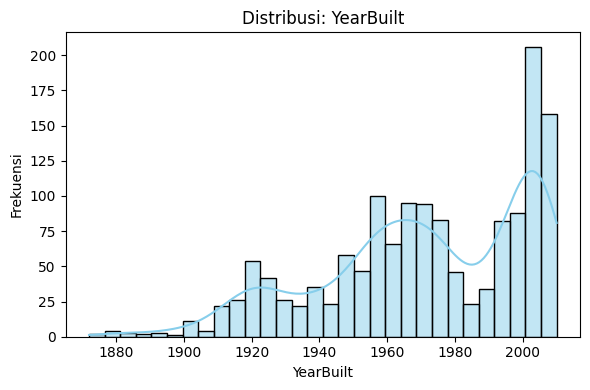

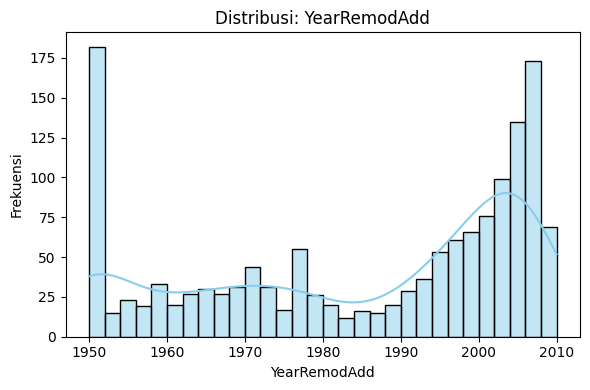

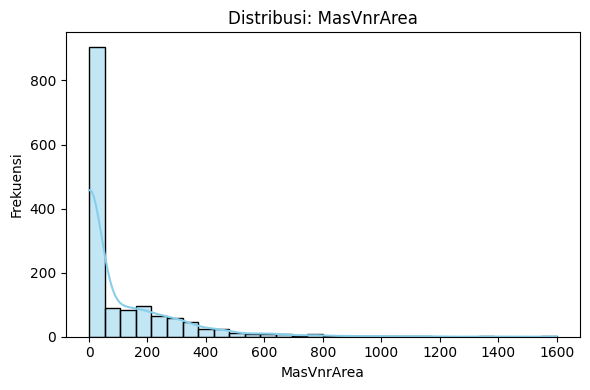

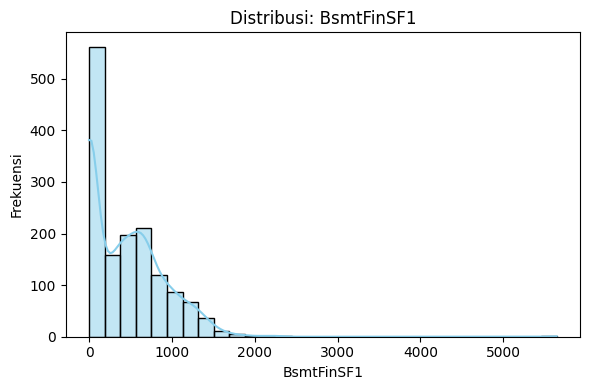

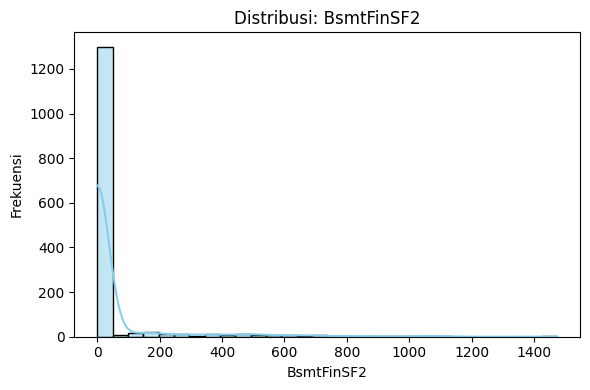

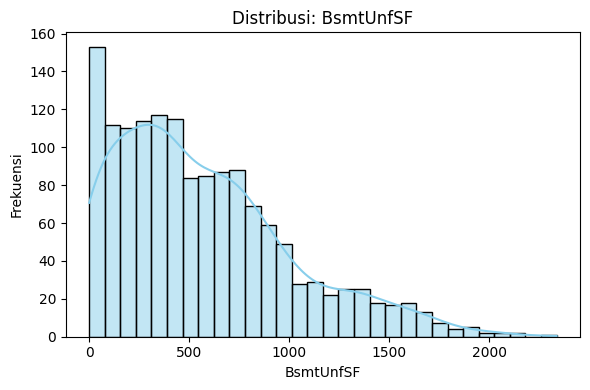

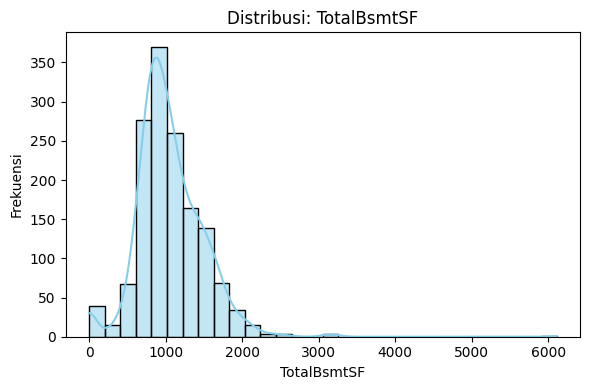

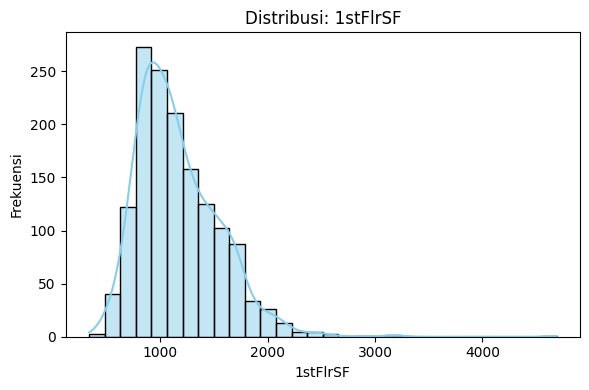

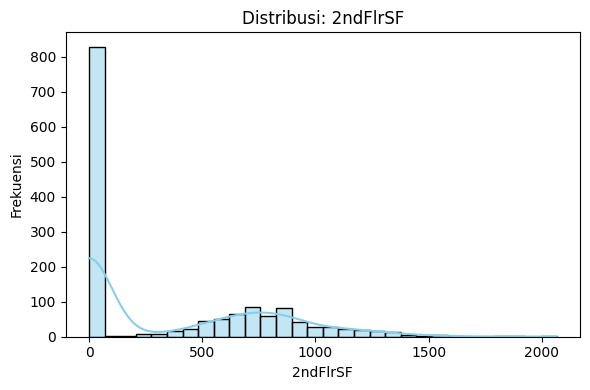

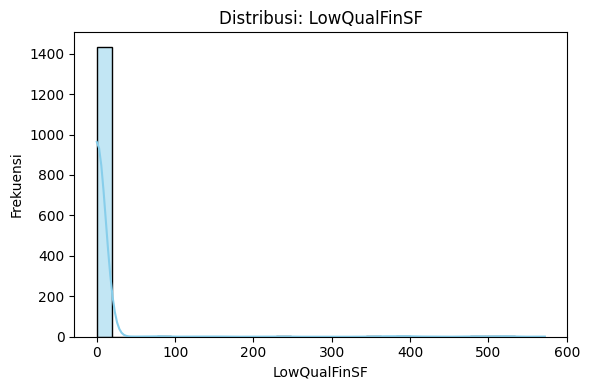

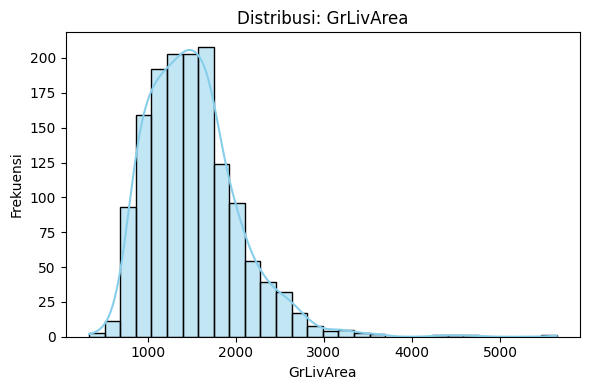

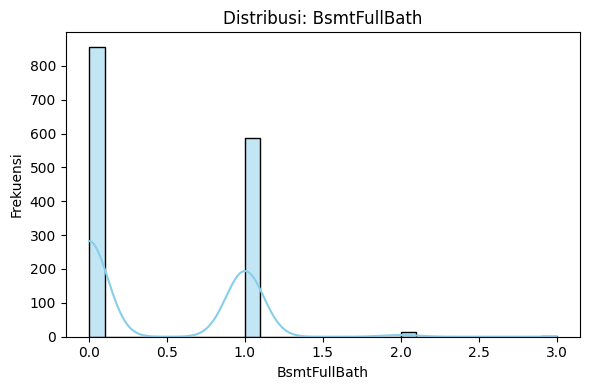

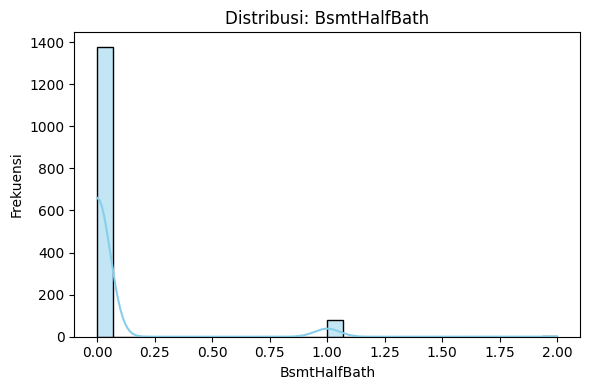

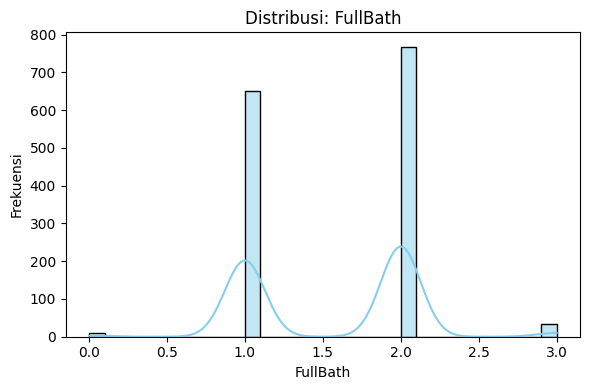

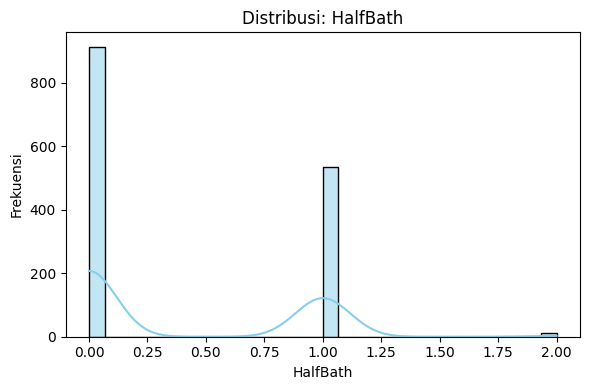

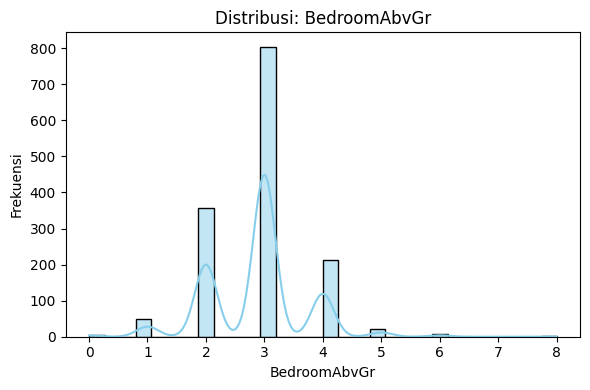

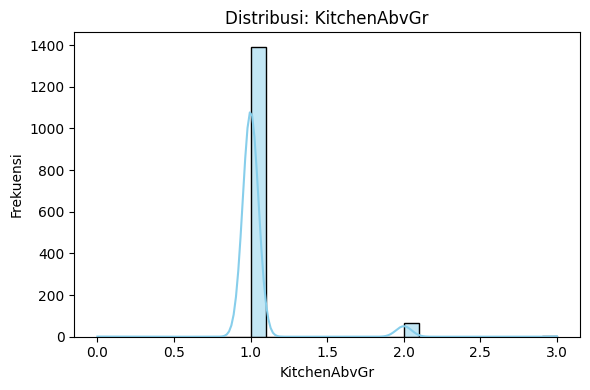

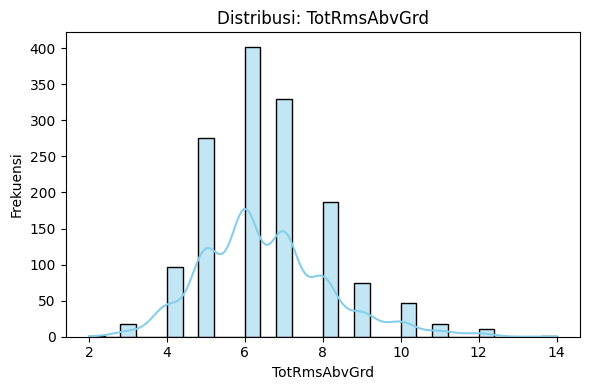

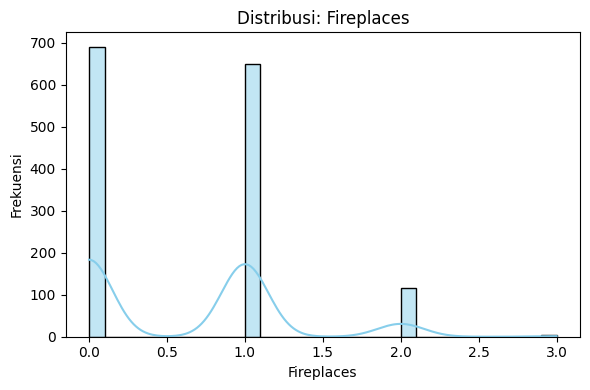

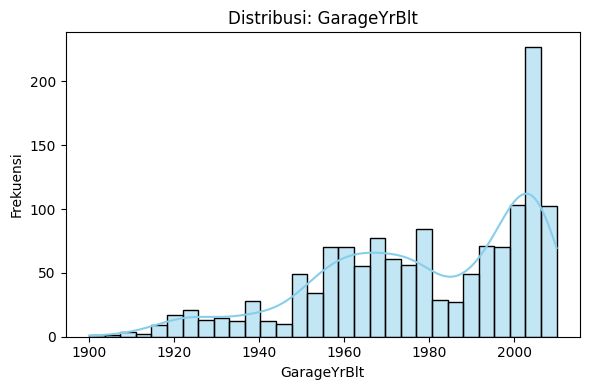

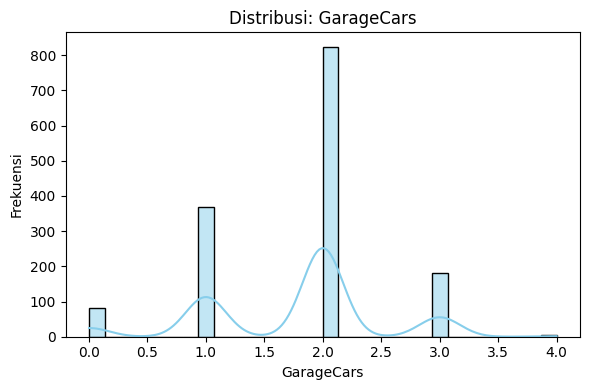

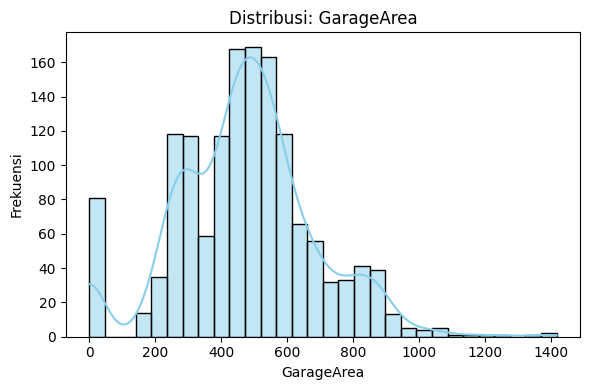

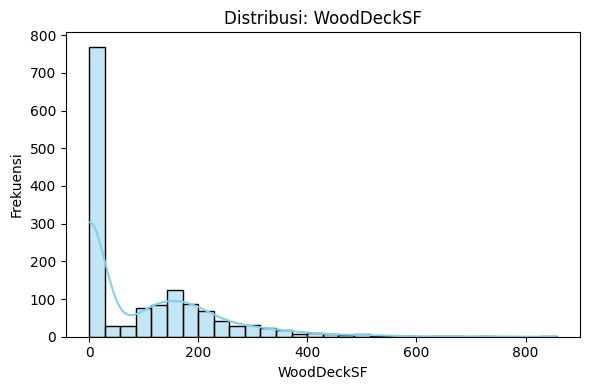

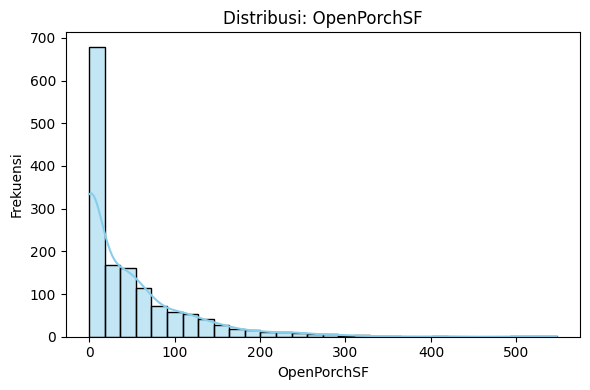

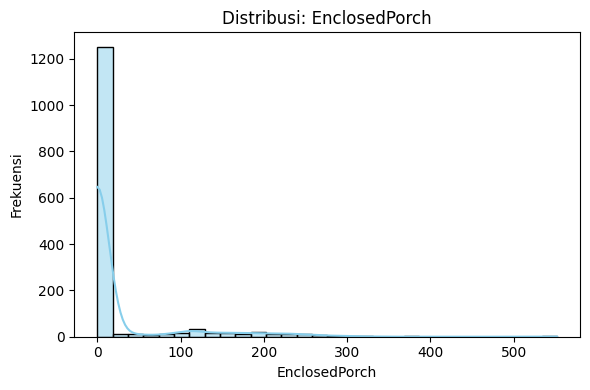

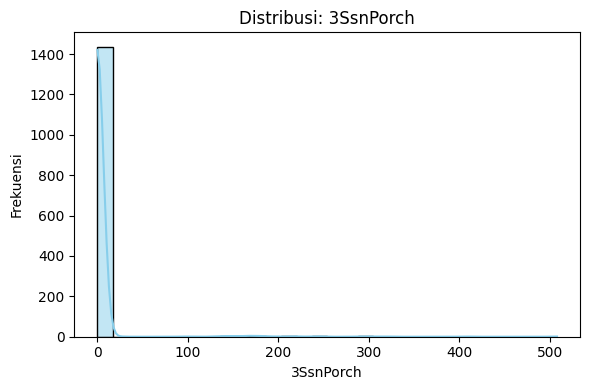

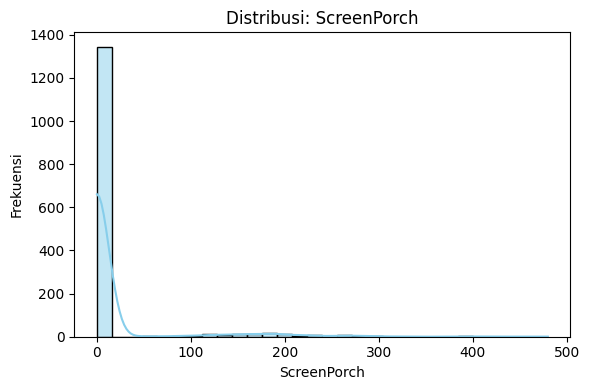

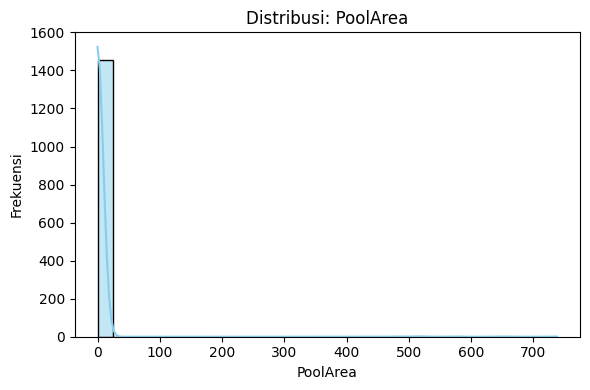

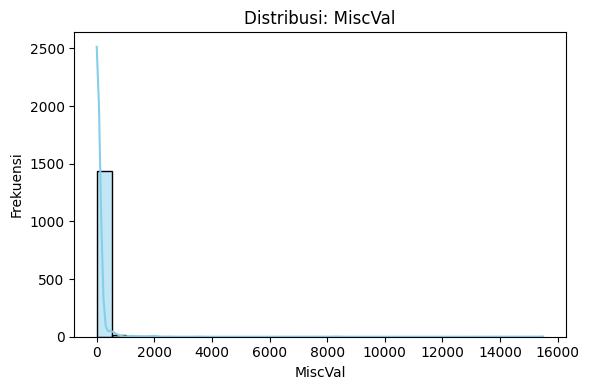

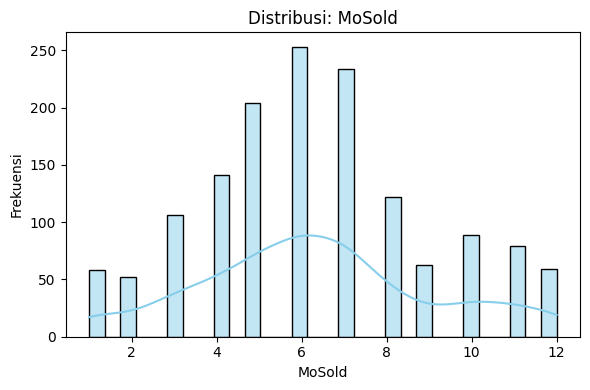

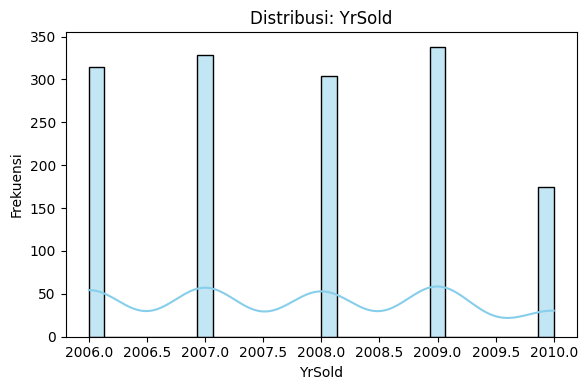

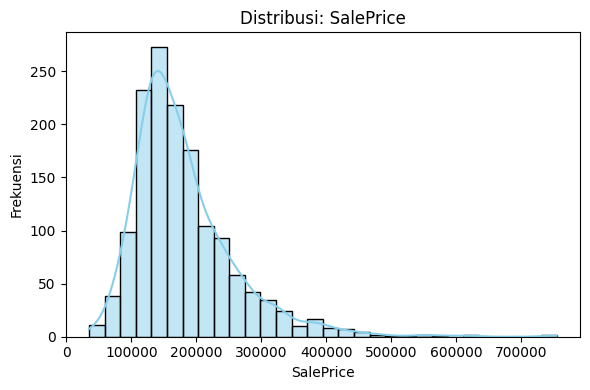

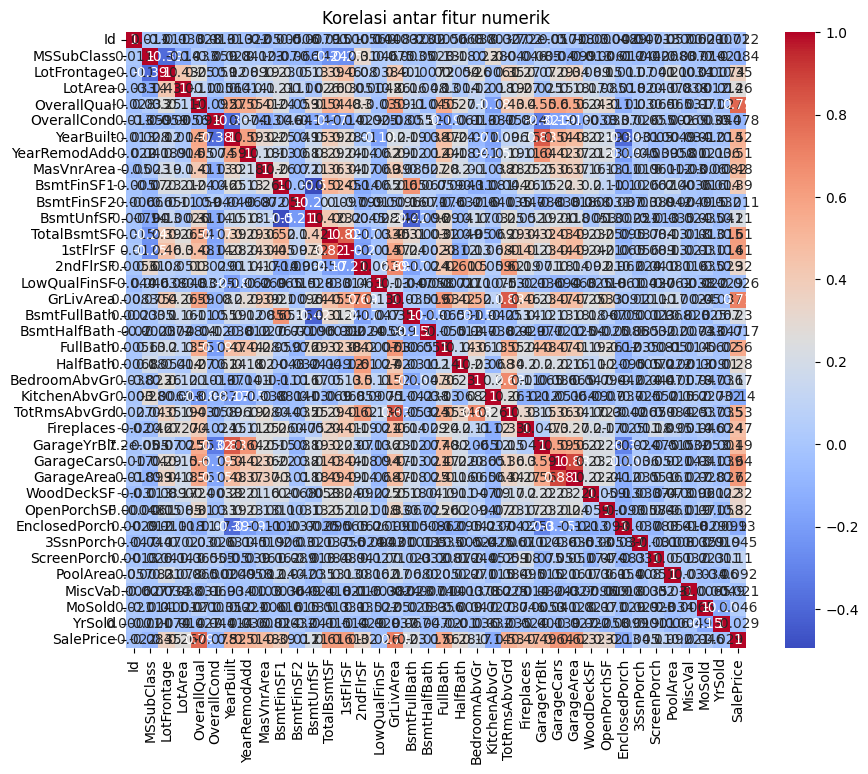

In [ ]:
# Info awal dataset
print("📋 Info dataset:")
train_df.info()

# Statistik deskriptif
print("\n📊 Statistik:")
print(train_df.describe())

# Cek missing value
print("\n🕳️ Missing value:")
print(train_df.isnull().sum())

# Visualisasi distribusi setiap kolom numerik
num_cols = train_df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

In [ ]:
# Isi missing value dengan rata-rata (numerik)
train_df.fillna(train_df.mean(numeric_only=True), inplace=True)
test_df.fillna(test_df.mean(numeric_only=True), inplace=True)

# Konfirmasi setelah isi missing value
print("Missing value setelah diisi:")
print(train_df.isnull().sum())

# Tangani fitur kategorikal: one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Sinkronkan kolom test agar sama dengan train
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

Missing value setelah diisi:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
# Ambil semua kolom numerik
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Loop untuk setiap kolom sebagai target
for target_col in numeric_cols:
    print(f"\nTarget saat ini: {target_col}")

    # Pisahkan fitur dan target (hilangkan target dari fitur)
    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]

    X_test = test_df.drop(columns=[target_col])
    y_test = test_df[target_col]

    # Buat dan latih model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi data test
    y_pred = model.predict(X_test)

    # Evaluasi data test
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Evaluasi data train
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Cetak hasil evaluasi
    print(f"Test  -> MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")
    print(f"Train -> MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

    if abs(r2_train - r2) > 0.1:
        print("Model kemungkinan overfitting.")
    else:
        print("Model tidak overfitting.")



Target saat ini: Id
Test  -> MSE: 2593193.5601 | RMSE: 1610.3396 | R²: -13.6186
Train -> MSE: 145899.4373 | RMSE: 381.9678 | R²: 0.1786
Model kemungkinan overfitting.

Target saat ini: MSSubClass
Test  -> MSE: 115.4122 | RMSE: 10.7430 | R²: 0.9368
Train -> MSE: 51.0712 | RMSE: 7.1464 | R²: 0.9714
Model tidak overfitting.

Target saat ini: LotFrontage
Test  -> MSE: 355.7970 | RMSE: 18.8626 | R²: 0.1578
Train -> MSE: 180.4019 | RMSE: 13.4314 | R²: 0.6278
Model kemungkinan overfitting.

Target saat ini: LotArea
Test  -> MSE: 159901547.7232 | RMSE: 12645.2184 | R²: -5.5159
Train -> MSE: 28161129.3729 | RMSE: 5306.7061 | R²: 0.7171
Model kemungkinan overfitting.

Target saat ini: OverallQual
Test  -> MSE: 1.9193 | RMSE: 1.3854 | R²: 0.0697
Train -> MSE: 0.3273 | RMSE: 0.5721 | R²: 0.8287
Model kemungkinan overfitting.

Target saat ini: OverallCond
Test  -> MSE: 2.2398 | RMSE: 1.4966 | R²: -0.8069
Train -> MSE: 0.4438 | RMSE: 0.6662 | R²: 0.6413
Model kemungkinan overfitting.

Target saat i

### Penjelasan Matematis

#### 1. Mean Squared Error (MSE)

MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- \( y_i \): nilai aktual  
- \( \hat{y}_i \): nilai prediksi  
- \( n \): jumlah sampel  
- MSE bernilai 0 jika prediksi sempurna, semakin besar nilainya, semakin buruk prediksi.

#### 2. Root Mean Squared Error (RMSE)

RMSE adalah akar dari MSE untuk mengembalikan satuan ke skala asli:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- RMSE sensitif terhadap outlier karena kesalahan dipangkatkan terlebih dahulu.

#### 3. Coefficient of Determination (R²)

R² mengukur seberapa baik model menjelaskan variasi dalam data:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

- \( \bar{y} \): rata-rata nilai aktual  
- Nilai \( R^2 \) mendekati 1 menandakan model menjelaskan sebagian besar variasi data.
